<center><h1>An Insight into Speeches of Political Leaders</h1></center>

### Team Member(s)
* Tan Ying Qi
* **Class**: Thu 7pm

### Data Source(s)
* State of the Union Address 2018, https://www.whitehouse.gov/briefings-statements/president-donald-j-trumps-state-union-address/ (Retrieved on 9 Apr 2019)
* National Day Rally Speech 2018, https://www.pmo.gov.sg/Newsroom/national-day-rally-2018 (Retrieved on 9 Apr 2019)
* National Day Rally Speech 2017, https://www.pmo.gov.sg/Newsroom/national-day-rally-2017 (Retrieved on 16 Apr 2019)
* National Day Rally Speech 2016, https://www.pmo.gov.sg/Newsroom/national-day-rally-2016 (Retrieved on 16 Apr 2019)
* National Day Rally Speech 2015, https://www.pmo.gov.sg/Newsroom/national-day-rally-2015 (Retrieved on 16 Apr 2019)
* National Day Rally Speech 2014, https://www.pmo.gov.sg/Newsroom/national-day-rally-2014 (Retrieved on 16 Apr 2019)


## 1. Executive Summary

This project seeks to derive insights from presidential speeches through text mining and sentiment analysis. The methodology adopted as follows: web-scraping, data preparation using the natural language processing technique, followed by performing sentiment analysis and generating word clouds. 

For the first part of the project, I have looked into comparing differences between Donald Trump's and PM Lee's speeches in 2018. Upon analysis, I come to conclude that Trump's speech contains stronger words whereas PM Lee's speech contains more neutral words. The two political leaders also focus on different issues as seen from the word cloud.

For the second part, I will be doing a temporal comparison of PM Lee's speeches across 5 years (2014-2018). It is interesting to find out that for one of the years, 2016, stronger negative words were used in the speech.

Disclaimer: This project is done for educational purposes and by no means represent any individual's political opinions.


## 2. Problem Statement and Datasets Selected
This project aims to critically evaluate the speeches delivered by national leaders in US and Singapore, through a sentiment analysis and evaluation of heavily emphasised key words used by these leaders in 2018. I have chosen this topic because I find that it is a meaningful area to look into. As part of the millenial population, we are more conscious of politics and world issues surrounding us as compared to the elder generations in the past at our age. This is due to the convenient access to vast amount of information available through the internet. Deriving insights regarding public issues is hence an interesting area that I have decided to look into. 

For the first part of the project, I will look into comparing differences between Donald Trump's and PM Lee's speeches in 2018. I have shortlisted the nature of speeches to annual speeches by political leaders that address the nation's initiatives and direction for 2018. For the US, the relevant speech is the State of the Union Address delivered by US President Donald Trump. The Singapore equivalent of the US State of the Union Address is the National Day Rally Speech delivered by our Prime Minister, Lee Hsien Loong. 

For the second part, I will be doing a temporal comparison of PM Lee's speeches across 5 years (2014-2018). Additional speeches by PM Lee has been extracted as well.

The source of the speeches can be found above. As there is no public APIs available, web-scraping will be used to extract the datasets to be used for the analysis. 

## 3. Methodology for Part 1
For Part 1, as mentioned earlier, we will be analysing and comparing the State of the Union Address 2018 by Donald Trump and the National Day Rally Speech 2018 by PM Lee. For these two speeches, the focus will be on the sentiment analysis, where we compare how positive or negative the sentiment is for each speech, as well as analysing what words and topics each leader has emphasised on. 

### 3.1 Preparation of Datasets
To prepare the datasets needed, web-scraping has been performed on the relevant websites. The relevant libraries are imported below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import nltk
import re

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from bs4 import BeautifulSoup

! pip install wordcloud
from wordcloud import WordCloud

#### 3.1.1: Web-scraping
* The web-scraped State of the Union Address 2018 will be saved in `trump_2018_doc`.
* The web-scraped National Day Rally 2018 will be saved in `pmlee_2018_doc`. Note that the transcript for PM Lee's speech contains headings and repeated quotes. For simplicity, these will not be removed in this project. More elaborated under "6. Conclusion".

In [2]:
trump_2018_response = requests.get('https://www.whitehouse.gov/briefings-statements/president-donald-j-trumps-state-union-address/')
trump_2018_soup = BeautifulSoup(trump_2018_response.text)
trump_2018_post_tag = trump_2018_soup.findAll('p')[3:-1] # Removing the additional rows that do not constitute the speech

# To remove tags 
trump_2018_unfiltered = []
for p in trump_2018_post_tag:
    trump_2018_unfiltered.append(p.text)

# To remove unicode spacings and symbols    
trump_2018_doc = []
for p in trump_2018_unfiltered:    
    p = re.sub("\xa0", "", p) 
    p = re.sub("[^a-zA-Z' ]+", "", p) 
    trump_2018_doc.append(p) 

In [3]:
pmlee_2018_response = requests.get('https://www.pmo.gov.sg/Newsroom/national-day-rally-2018')
pmlee_2018_soup = BeautifulSoup(pmlee_2018_response.text)
pmlee_2018_post_tag = pmlee_2018_soup.findAll('p')[3:-7] 

# To remove the tags
pmlee_2018_unfiltered = []
for p in pmlee_2018_post_tag:
    pmlee_2018_unfiltered.append(p.text) 
    
# To remove symbols    
pmlee_2018_doc = []
for p in pmlee_2018_unfiltered:
    p = re.sub("[^a-zA-Z' ]+", "", p)
    pmlee_2018_doc.append(p)

#### 3.1.2 NLP Process
Each list derived above are currently made up of several lists. Hence, we will need to tokenize it such that the list only consist of single words (terms). All 5 steps from tokenization, stemming, POS tagging, lematisation and stop word removal will be done for each speech.
* The final list of words for the State of Union Address 2018 will be stored in `trump_2018`.
* The final list of words for the National Day Rally 2018 will be stored in `pmlee_2018`.

In [4]:
# Step 1: Tokenization
trump_2018_tokens = [] 
for document in trump_2018_doc:
    terms = document.split() 
    for term in terms:
        trump_2018_tokens.append(term.lower()) 

# Step 2: POS Tagging
trump_2018_tagged_words_by_treebank = nltk.pos_tag(trump_2018_tokens)
trump_2018_tagged_words = []
for twt in trump_2018_tagged_words_by_treebank:
    trump_2018_tagged_words.append((twt[0], twt[1][0].lower()))

# Step 3: Lemmatisation
lemmatiser = WordNetLemmatizer()
trump_2018_lemmed_words = []
for tw_pair in trump_2018_tagged_words:
    tw_word, tw_tag = tw_pair[0], tw_pair[1]
    lemm_word = tw_word
    try: 
        lemm_word = lemmatiser.lemmatize(tw_word, pos=tw_tag)
    except KeyError:
        pass
    trump_2018_lemmed_words.append(lemm_word)

# Step 4: Stopword Removal
my_stopwords = stopwords.words('english')
my_stopwords.extend(["year", "one", "tonight", "new", "many"])
trump_2018 = []
for lemmed_word in trump_2018_lemmed_words:
    if lemmed_word not in my_stopwords:
        trump_2018.append(lemmed_word)

In [11]:
# Step 1: Tokenization
pmlee_2018_tokens = [] 
for document in pmlee_2018_doc:
    terms = document.split() 
    for term in terms:
        pmlee_2018_tokens.append(term.lower()) 

# Step 2: POS Tagging
pmlee_2018_tagged_words_by_treebank = nltk.pos_tag(pmlee_2018_tokens)
pmlee_2018_tagged_words = []
for twt in pmlee_2018_tagged_words_by_treebank:
    pmlee_2018_tagged_words.append((twt[0], twt[1][0].lower()))

# Step 3: Lemmatisation
lemmatiser = WordNetLemmatizer()
pmlee_2018_lemmed_words = []
for tw_pair in pmlee_2018_tagged_words:
    tw_word, tw_tag = tw_pair[0], tw_pair[1]
    lemm_word = tw_word
    try: 
        lemm_word = lemmatiser.lemmatize(tw_word, pos=tw_tag)
    except KeyError:
        pass
    pmlee_2018_lemmed_words.append(lemm_word)

# Step 4: Stopword Removal
pmlee_2018 = []
for lemmed_word in pmlee_2018_lemmed_words:
    if lemmed_word not in my_stopwords:
        pmlee_2018.append(lemmed_word)

### 3.2 Sentiment Analysis
#### Method
A sentiment analysis will be performed on both speeches to compare the sentiments of each speech. 

In [6]:
sid = SentimentIntensityAnalyzer()
trump_2018_speech = ' '.join(trump_2018)
print(sid.polarity_scores(trump_2018_speech))

{'neg': 0.156, 'neu': 0.593, 'pos': 0.251, 'compound': 0.9998}


In [12]:
pmlee_2018_speech = ' '.join(pmlee_2018)
print(sid.polarity_scores(pmlee_2018_speech))

{'neg': 0.052, 'neu': 0.727, 'pos': 0.221, 'compound': 1.0}


#### Evaluation
Analysis of overall sentiment score of both speeches has revealed the following:
* Both speeches have a high compound score which indicates strong positive sentiments (Trump: 0.9998; PM Lee: 1.0).
* Both speeches are made up of mostly neutral sentiments, followed by postitive sentiments and then negative sentiments.
* While PM Lee had a lower negative sentiment score (Trump: 0.156; PM Lee: 0.052), it was interesting to find out that Trump had a higher positive sentiment score (Trump: 0.251; PM Lee: 0.221). 
* PM Lee also had a higher neutral sentiment score (Trump: 0.593; PM Lee: 0.727), which may hint that PM Lee tends to avoid using strong words as compared to Trump. 

### 3.3 Generating Word Clouds
A word cloud has been generated for each speech to give a pictorial understanding of which are the words most frequently used during the speeches. 

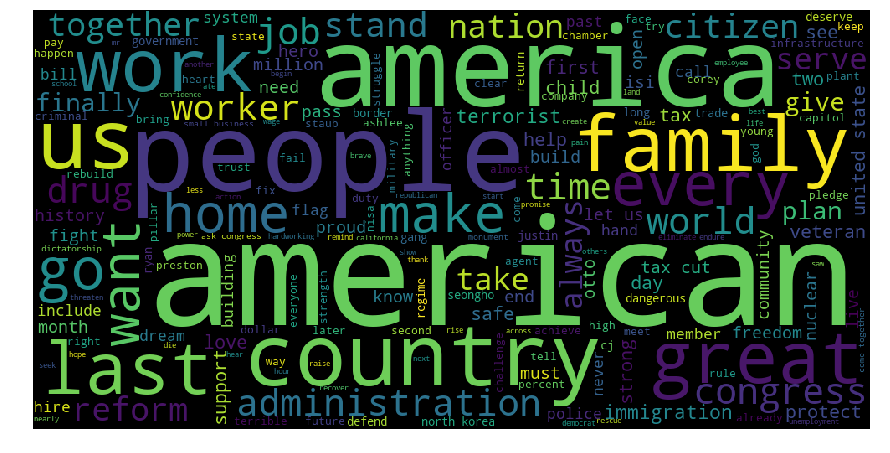

In [16]:
# Trump's word cloud 
unique_string=(" ").join(trump_2018)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


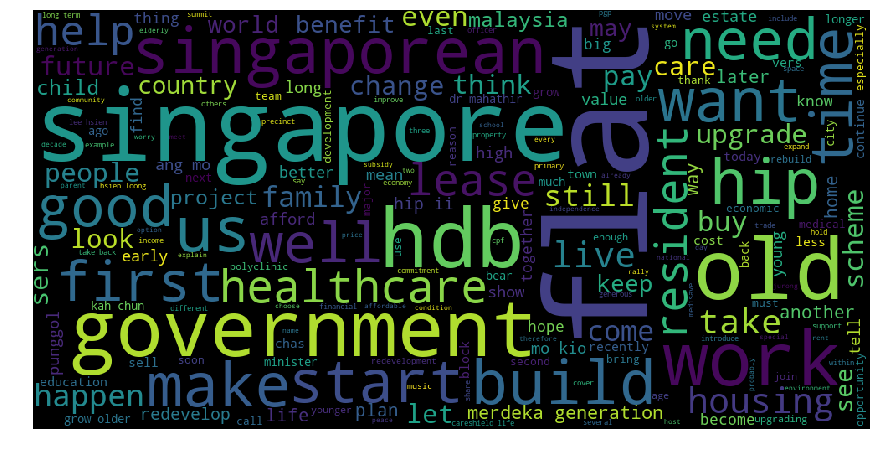

In [13]:
# PM Lee's word cloud
unique_string=(" ").join(pmlee_2018)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Evaluation
From the word cloud generated, it can be observed that Trump places a lot of emphasis on "America" and "Americans". Similarly, PM Lee places a lot of emphasis on "Singapore" as well. This is not unexpected as these are speeeches that concerns the nation's outlook for the year, hence the countries will be mentioned rather frequently. 

An interesting insight is that in PM Lee's speech, the words "flat", "hdb", "old" and "government" appeared rather frequently. This is in contrast to Trump's speech, where words like "people", "work" and "family" appeared more frequently. This reveals the different emphasis and national issues that each political leader was trying to target through their respective speeches.

## 4. Methodology for Part 2
For Part 2, as mentioned earlier, we will be analysing and comparing the National Day Rally Speeches delivered by PM Lee across 5 years. 

### 4.1 Preparation of Datasets
To prepare the datasets needed, web-scraping and lemmatisation has been performed on the relevant websites. 

* As repetitive functions are used in the preparation of the datasets, and the data to be scrapped are from the same source with similar html structure, a function has been written to prepare the datasets.
* The prepared dataset for National Day Rally YYYY will be saved in `pmlee_YYYY` where YYYY represents the year.

Note that the transcript for PM Lee's speech contains headings and repeated quotes. For simplicity, these will not be removed in this project. More elaborated under "6. Conclusion".

In [34]:
def prepare(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    post_tag = soup.findAll('p')[3:-7] 
    
    # To remove the tags
    unfiltered = []
    for p in post_tag:
        unfiltered.append(p.text) 
    
    # To remove symbols 
    doc = []
    for p in unfiltered:
        p = re.sub("[^a-zA-Z' ]+", "", p)
        doc.append(p)
        
    # Step 1: Tokenization
    tokens = [] 
    for document in doc:
        terms = document.split() 
        for term in terms:
            tokens.append(term.lower()) 
    
    # Step 2: POS Tagging
    tagged_words_by_treebank = nltk.pos_tag(tokens)
    tagged_words = []
    for twt in tagged_words_by_treebank:
        tagged_words.append((twt[0], twt[1][0].lower()))
    
    # Step 3: Lemmatisation
    lemmatiser = WordNetLemmatizer()
    lemmed_words = []
    for tw_pair in tagged_words:
        tw_word, tw_tag = tw_pair[0], tw_pair[1]
        lemm_word = tw_word
        try: 
            lemm_word = lemmatiser.lemmatize(tw_word, pos=tw_tag)
        except KeyError:
            pass
        lemmed_words.append(lemm_word)
    
    # Step 4: Stopword Removal
    prepared = []
    for lemmed_word in lemmed_words:
        if lemmed_word not in my_stopwords:
            prepared.append(lemmed_word)
    
    return prepared

url_2017 = 'https://www.pmo.gov.sg/Newsroom/national-day-rally-2017'
pmlee_2017 = prepare(url_2017)

url_2016 = 'https://www.pmo.gov.sg/Newsroom/national-day-rally-2016'
pmlee_2016 = prepare(url_2016)

url_2015 = 'https://www.pmo.gov.sg/Newsroom/national-day-rally-2015'
pmlee_2015 = prepare(url_2015)

url_2014 = 'https://www.pmo.gov.sg/Newsroom/national-day-rally-2014'
pmlee_2014 = prepare(url_2014)


### 4.2 Sentiment Analysis
#### Method
A sentiment analysis will be performed on both speeches to compare the sentiments of each speech. 

In [35]:
sid = SentimentIntensityAnalyzer()
pmlee_2018_speech = ' '.join(pmlee_2018)
print(sid.polarity_scores(pmlee_2018_speech))
pmlee_2017_speech = ' '.join(pmlee_2017)
print(sid.polarity_scores(pmlee_2017_speech))
pmlee_2016_speech = ' '.join(pmlee_2016)
print(sid.polarity_scores(pmlee_2016_speech))
pmlee_2015_speech = ' '.join(pmlee_2015)
print(sid.polarity_scores(pmlee_2015_speech))
pmlee_2014_speech = ' '.join(pmlee_2014)
print(sid.polarity_scores(pmlee_2014_speech))

{'neg': 0.052, 'neu': 0.727, 'pos': 0.221, 'compound': 1.0}
{'neg': 0.057, 'neu': 0.724, 'pos': 0.219, 'compound': 1.0}
{'neg': 0.092, 'neu': 0.689, 'pos': 0.219, 'compound': 1.0}
{'neg': 0.065, 'neu': 0.699, 'pos': 0.236, 'compound': 1.0}
{'neg': 0.039, 'neu': 0.723, 'pos': 0.238, 'compound': 1.0}


#### Evaluation
Analysis of overall sentiment score of both speeches has revealed the following:
* The 2016 speech had the highest negative sentiment and lowest positive and neutral sentiments.
* The 2014 speech had the lowest negative sentiment and highest positive sentiment.

## 5. Conclusion
Text mining and conducting sentiment analysis on different speeches have enabled me to obtain more insights (as reflected in the evaluation paragraphs).
Should there be an opportunity to work on this again, I would like to perform machine learning on the datasets to derive eve greater insights.

## 6. Credits
* Removing unicode spacings: https://stackoverflow.com/questions/10993612/python-removing-xa0-from-string 
* Removing non-letters and apostrophe: https://stackoverflow.com/questions/47561298/python-regex-remove-escape-characters-and-punctuation-except-for-apostrophe?rq=1